In [8]:
import sys
dirname = '/Users/m.daffarobani/Documents/personal_research/smt'
if dirname not in sys.path:
    sys.path.append(dirname)

from smt.explainability_tools import partial_dependence
from smt.explainability_tools._pd_feature_importance import pd_feature_importance
# from smt.explainability_tools import PartialDependenceDisplay

import pandas as pd
import numpy as np
from smt.surrogate_models import KRG
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [2]:
X_tr = pd.read_csv('../../X_tr_wing_weight.csv')
X_te = pd.read_csv('../../X_te_wing_weight.csv')
y_tr = pd.read_csv('../../y_tr_wing_weight.csv')
y_te = pd.read_csv('../../y_te_wing_weight.csv')
X_tr = np.array(X_tr)
X_te = np.array(X_te)
y_tr = np.array(y_tr)
y_te = np.array(y_te)

kriging_model = KRG(theta0=[1e-2]*X_tr.shape[1],print_prediction = False)
kriging_model.set_training_values(X_tr, y_tr)

kriging_model.train()

y_pred = kriging_model.predict_values(X_te)
rmse = mean_squared_error(y_te, y_pred, squared=False)
rmse

___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 500
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec): 12.0940919


0.04697580133054768

In [3]:
# model = kriging_model
# features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# pd_results = partial_dependence(model, X_tr, features, kind="average")

In [4]:
model = kriging_model
features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
importances = pd_feature_importance(model, X_tr, features)

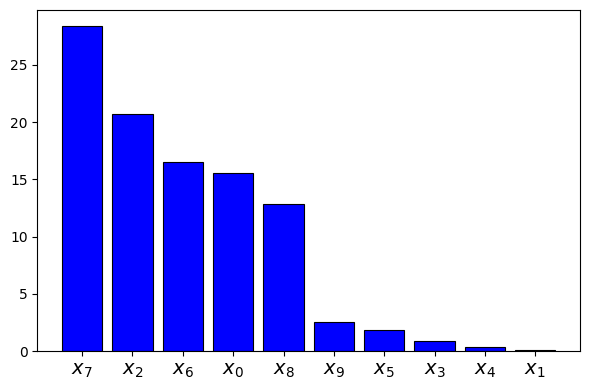

In [39]:
feature_names = None
sorted = False

if feature_names is None:
    feature_names = [fr'$x_{i}$' for i in range(len(importances))]

feature_names = np.array(feature_names)
importances = np.array(importances)
if not sorted:
    vis_feature_names = feature_names[np.argsort(importances*-1)]
    vis_importances = importances[np.argsort(importances*-1)]
else:
    vis_feature_names = feature_names
    vis_importances = importances

fig, ax = plt.subplots(1, 1, figsize=[len(vis_importances)*0.6, 4])
ax.bar(np.arange(len(vis_importances)), vis_importances, color='blue', edgecolor='black', linewidth=0.8)
ax.set_xticks(np.arange(len(vis_importances)))
ax.set_xticklabels(vis_feature_names, fontsize=14)
fig.tight_layout()

In [28]:
feature_names = feature_names[np.argsort(importances)]

TypeError: only integer scalar arrays can be converted to a scalar index

In [5]:
# pd_result = pd_results[7]
# average_pd= pd_result['average']
# k = len(average_pd)
# mean = np.mean(average_pd)
# importance = np.power(np.sum((average_pd - mean)**2) / (k-1), 0.5)
# importance